In [1]:
# ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Diving deeper into the analysis and API

This notebook is meant to give a quick introduction into the main features and workflows of [pyaerocom](http://aerocom.met.no/pyaerocom/). 

This includes brief introductions into the following features:

- Finding model and observation data on the AeroCom servers (method `browse_database`).
- Reading of ***gridded*** model data (`ReadGridded` class).
- Reading of ***ungridded*** observation data (`ReadUngridded` class).
- Working with ***gridded*** data (`GriddedData` class).
- Working with ***ungridded*** data (`UngriddedData` class).
- Retrieving and working with data from individual stations (`StationData` class).
- ***Colocation*** of model data with all stations from an observation network.

In [3]:
import pyaerocom as pya
pya.__version__

'0.10.0rc2'

Should be at least 0.10.X

#### Check access to testdata

**NOTE**: details regarding testdata access and intialization are covered in tutorial notebook *getting_started_setup.ipynb*.

In [4]:
from pyaerocom.testdata_access import initialise
initialise()

Adding data search directory /home/jonasg/MyPyaerocom/testdata-minimal/modeldata.
Adding data search directory /home/jonasg/MyPyaerocom/testdata-minimal/obsdata.
Adding data search directory /home/jonasg/MyPyaerocom/testdata-minimal/config.
Adding ungridded dataset AeronetSunV3L2Subset.daily located at /home/jonasg/MyPyaerocom/testdata-minimal/obsdata/AeronetSunV3Lev2.daily/renamed.Reader: <class 'pyaerocom.io.read_aeronet_sunv3.ReadAeronetSunV3'>
Adding ungridded dataset AeronetSDAV3L2Subset.daily located at /home/jonasg/MyPyaerocom/testdata-minimal/obsdata/AeronetSDAV3Lev2.daily/renamed.Reader: <class 'pyaerocom.io.read_aeronet_sdav3.ReadAeronetSdaV3'>
Adding ungridded dataset AeronetInvV3L2Subset.daily located at /home/jonasg/MyPyaerocom/testdata-minimal/obsdata/AeronetInvV3Lev2.daily/renamed.Reader: <class 'pyaerocom.io.read_aeronet_invv3.ReadAeronetInvV3'>
Adding ungridded dataset EBASSubset located at /home/jonasg/MyPyaerocom/testdata-minimal/obsdata/EBASMultiColumn.Reader: <clas

## Reading of and working with *gridded* model data (`ReadGridded` and `GriddedData` classes)

This section illustrates the reading of gridded data as well as some features of the `GriddedData` class of *pyaerocom*. First, however, we have to find a valid model ID for the reading (cf. flow chart).

### Find model data

The database contains data from the CAM53-Oslo model, which is used in the following. You can use the `browse_database` function of pyaerocom to find model ID's (which can be quite cryptic sometimes) using wildcard pattern search.

In [5]:
pya.browse_database('*TM5*')


Pyaerocom ReadGridded
---------------------
Data ID: TM5-met2010_CTRL-TEST
Data directory: /home/jonasg/MyPyaerocom/testdata-minimal/modeldata/TM5-met2010_CTRL-TEST/renamed
Available experiments: ['AP3']
Available years: [2010]
Available frequencies ['daily' 'monthly']
Available variables: ['abs550aer', 'od550aer']


['TM5-met2010_CTRL-TEST']

### Initiate reader class

In [6]:
reader = pya.io.ReadGridded('TM5-met2010_CTRL-TEST')

You can have a look at the individual files and corresponding metadata using the `file_info` attribute:

In [7]:
reader.file_info

,var_name,year,ts_type,vert_code,data_id,name,meteo,experiment,perturbation,is_at_stations,3D,filename
0,abs550aer,2010,daily,Column,TM5-met2010_CTRL-TEST,TM5,met2010,AP3,CTRL2019,False,False,aerocom3_TM5-met2010_AP3-CTRL2019_abs550aer_Co...
3,abs550aer,2010,monthly,Column,TM5-met2010_CTRL-TEST,TM5,met2010,AP3,CTRL2019,False,False,aerocom3_TM5-met2010_AP3-CTRL2019_abs550aer_Co...
1,od550aer,2010,daily,Column,TM5-met2010_CTRL-TEST,TM5,met2010,AP3,CTRL2019,False,False,aerocom3_TM5-met2010_AP3-CTRL2019_od550aer_Col...
2,od550aer,2010,monthly,Column,TM5-met2010_CTRL-TEST,TM5,,AP3,CTRL2016,False,False,aerocom3_TM5_AP3-CTRL2016_od550aer_Column_2010...


You can also filter this attribute based on what you are interested in. E.g.:

In [8]:
reader.filter_files(var_name='od550aer')

,var_name,year,ts_type,vert_code,data_id,name,meteo,experiment,perturbation,is_at_stations,3D,filename
1,od550aer,2010,daily,Column,TM5-met2010_CTRL-TEST,TM5,met2010,AP3,CTRL2019,False,False,aerocom3_TM5-met2010_AP3-CTRL2019_od550aer_Col...
2,od550aer,2010,monthly,Column,TM5-met2010_CTRL-TEST,TM5,,AP3,CTRL2016,False,False,aerocom3_TM5_AP3-CTRL2016_od550aer_Column_2010...


### Read Aerosol optical depth at 550 nm (od550aer)

In [9]:
od550aer = reader.read_var('od550aer')

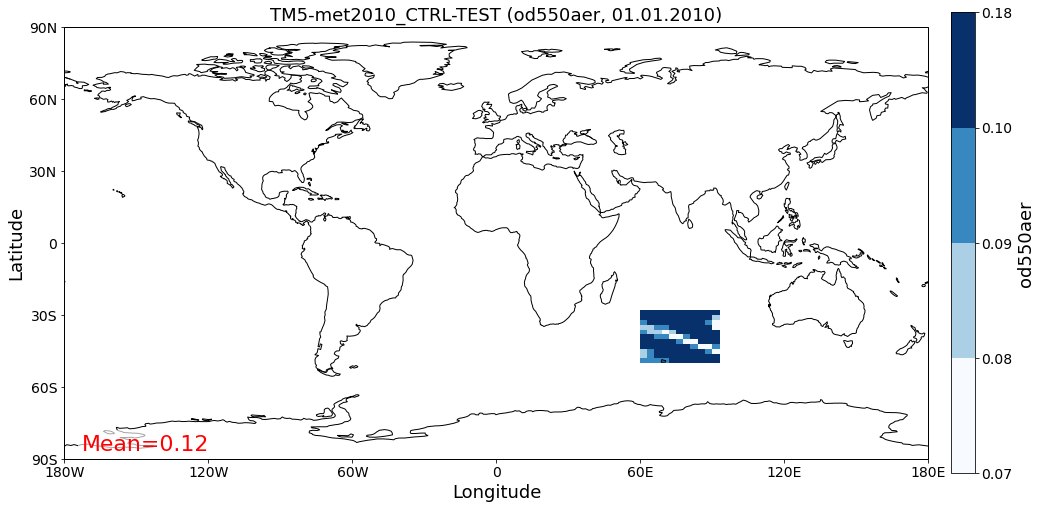

In [10]:
od550aer.quickplot_map();

Ups, this looks rather incomplete. The reason is that pyaerocom picked the available *daily* dataset, which is cropped in the *minimal* testdataset for storage purpose. Let's try monthly.

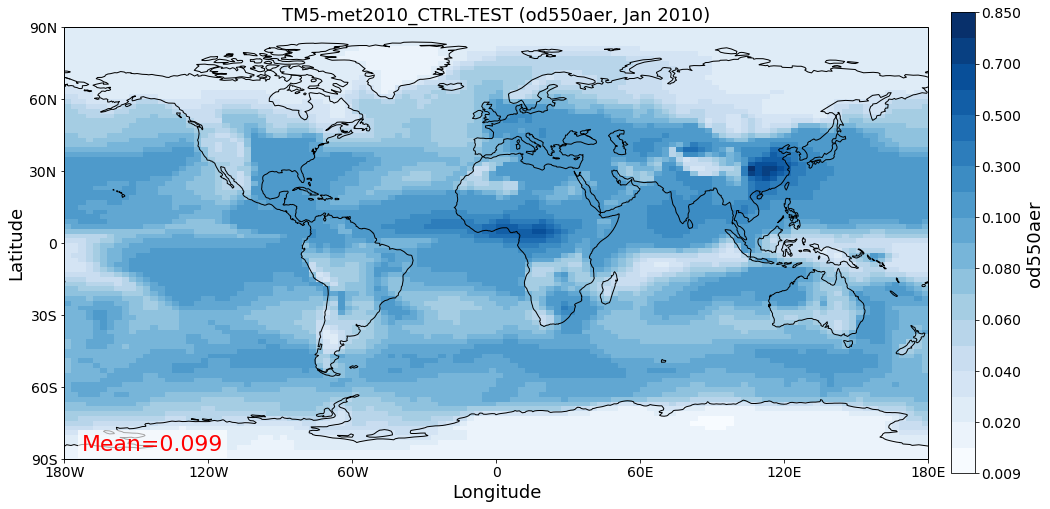

In [11]:
od550aer_tm5 = reader.read_var('od550aer', ts_type='monthly')
od550aer_tm5.quickplot_map();

Looking better. You may wonder why only January is displayed here. This is because `quickplot_map` picks the first available timestamp in the dataset, you may specify that explicitly.

Under the hood [pyaerocom.GriddedData](http://aerocom.met.no/pyaerocom/api.html#module-pyaerocom.griddeddata) is based on the [iris.Cube object](https://scitools.org.uk/iris/docs/v1.9.0/html/iris/iris/cube.html#iris.cube.Cube) class ([iris library](https://scitools.org.uk/iris/docs/v1.9.0/html/index.html)) and features very similar functionality (and more).

The loaded `Cube` instance can be accessed via:

In [12]:
od550aer_tm5.cube

<iris 'Cube' of atmosphere_optical_thickness_due_to_ambient_aerosol / (1) (time: 12; latitude: 90; longitude: 120)>

### Conversion to xarray

If you have not heard of xarray, you should [check it out](http://xarray.pydata.org/en/stable/). If you have heard of it (or maybe even used it already) you may convert a `GriddedData` object to an `xarray.DataArray` via:

In [13]:
xarr = od550aer_tm5.to_xarray()
xarr

<xarray.DataArray 'od550aer' (time: 12, lat: 90, lon: 120)>
dask.array<filled, shape=(12, 90, 120), dtype=float32, chunksize=(12, 90, 61), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2010-01-15 12:00:00 ... 2010-12-15 12:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 -181.5 -178.5 -175.5 -172.5 ... 169.5 172.5 175.5
Attributes:
    standard_name:     atmosphere_optical_thickness_due_to_ambient_aerosol
    long_name:         Ambient Aerosol Optical Thickness at 550 nm
    institution:       Royal Netherlands Meteorological Institute, De Bilt, T...
    institute_id:      KNMI
    source:            TM5-mp: CTM ERA-Interim 3x2 34L
    model_id:          TM5
    references:        Van Noije, T.P.C., et al. (Geosci. Model Dev., 7, 2435...
    experiment_id:     AP3-CTRL2016
    project_id:        AeroCom Phase 3
    title:             TM5 model output prepared for AeroCom Phase 3
    Conventions:       CF-1.6
    contact:           Twan van Noije (noije@knmi.nl)
    from_files:        ['/home/jonasg/MyPyaerocom/testdata-minimal/modeldata/...
    data_id:           TM5-met2010_CTRL-TEST
    var_name_read:     n/d
    ts_type:           monthly
    regridded:         False
    outliers_removed:  False
    computed:          False
    concatenated:      False
    meteo:             
    experiment:        AP3
    perturbation:      CTRL2016
    cell_methods:      longitude: latitude: point time: mean

### Overview of what is in the data

Simply print the object.

In [35]:
print(od550aer)

pyaerocom.GriddedData: TM5-met2010_CTRL-TEST
Grid data: atmosphere_optical_thickness_due_to_ambient_aerosol / (1) (time: 365; latitude: 11; longitude: 11)
     Dimension coordinates:
          time                                                 x              -              -
          latitude                                             -              x              -
          longitude                                            -              -              x
     Attributes:
          Conventions: CF-1.6
          NCO: 4.7.2
          computed: False
          concatenated: False
          contact: Twan van Noije (noije@knmi.nl)
          data_id: TM5-met2010_CTRL-TEST
          experiment: AP3
          experiment_id: AP3-CTRL2019
          from_files: ['/home/jonasg/MyPyaerocom/testdata-minimal/modeldata/TM5-met2010_CTRL...
          history: Wed Jul  8 10:31:53 2020: ncks -d lat,20,30 -d lon,20,30 raw/aerocom3_TM5-met2010_AP3-CTRL2019_od550aer_Column_2010_daily.nc...
          

### Access time stamps

Time stamps are represented as numerical values with respect to a reference date and frequency, according to the CF conventions. They can be accessed via the `time` attribute of the data class.

In [10]:
od550aer.time

DimCoord(array([   0.,   31.,   60.,   91.,  121.,  152.,  182.,  213.,  244.,
        274.,  305.,  335.,  366.,  397.,  425.,  456.,  486.,  517.,
        547.,  578.,  609.,  639.,  670.,  700.,  731.,  762.,  790.,
        821.,  851.,  882.,  912.,  943.,  974., 1004., 1035., 1065.,
       1096., 1127., 1155., 1186., 1216., 1247., 1277., 1308., 1339.,
       1369., 1400., 1430., 1461., 1492., 1521., 1552., 1582., 1613.,
       1643., 1674., 1705., 1735., 1766., 1796., 1827., 1858., 1886.,
       1917., 1947., 1978., 2008., 2039., 2070., 2100., 2131., 2161.,
       2192., 2223., 2251., 2282., 2312., 2343., 2373., 2404., 2435.,
       2465., 2496., 2526.]), standard_name='time', units=Unit('days since 2004-01-01 00:00:00', calendar='gregorian'), long_name='Time', var_name='time')

You may also want the time-stamps in the form of actual datetime-like objects. These can be computed using the `time_stamps()` method:

In [11]:
od550aer.time_stamps()[0:3]

array(['2004-01-01T00:00:00.000000', '2004-02-01T00:00:00.000000',
       '2004-03-01T00:00:00.000000'], dtype='datetime64[us]')

### Plotting maps

As introduced above, maps of individual time stamps can be plotted using the quickplot_map method. Above we used the default call, which chooses the first available timestamp. You may also specify which date you are interested in:

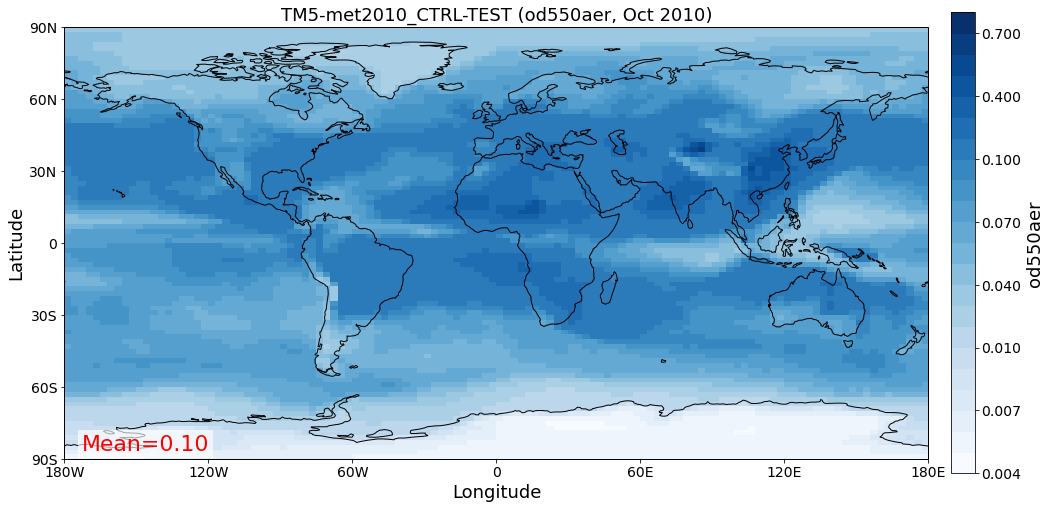

In [25]:
od550aer_tm5.quickplot_map('2010-10');

### Regional filtering

Regional filtering can be performed using the [Filter](http://aerocom.met.no/pyaerocom/api.html#module-pyaerocom.filter) class. 

#### Rectangular regions

An overview of rectangular AeroCom default regions can be accessed via:

In [18]:
print(pya.region.get_all_default_region_ids())

['WORLD', 'ASIA', 'AUSTRALIA', 'CHINA', 'EUROPE', 'INDIA', 'NAFRICA', 'SAFRICA', 'SAMERICA', 'NAMERICA']


Let's choose north Africa as an example. Create instance of Filter class:

In [28]:
f = pya.Filter('NAFRICA')

You can print its `region` attribute to see the edges:

In [29]:
print(f.region)

pyaeorocom Region
Name: NAFRICA
Longitude range: [-17, 50]
Latitude range: [0, 40]
Longitude range (plots): [-17, 50]
Latitude range (plots): [0, 40]


Now apply to the model data object:

In [30]:
od550aer_nafrica = f(od550aer_tm5)

Compare shapes:

In [16]:
od550aer_nafrica

pyaerocom.GriddedData
Grid data: <iris 'Cube' of Aerosol optical depth at 500nm / (1) (time: 84; latitude: 42; longitude: 57)>

In [31]:
od550aer_tm5

pyaerocom.GriddedData
Grid data: <iris 'Cube' of atmosphere_optical_thickness_due_to_ambient_aerosol / (1) (time: 12; latitude: 90; longitude: 120)>

As you can see, the filtered object is reduced in the longitude and latitude dimension. Let's have a look:

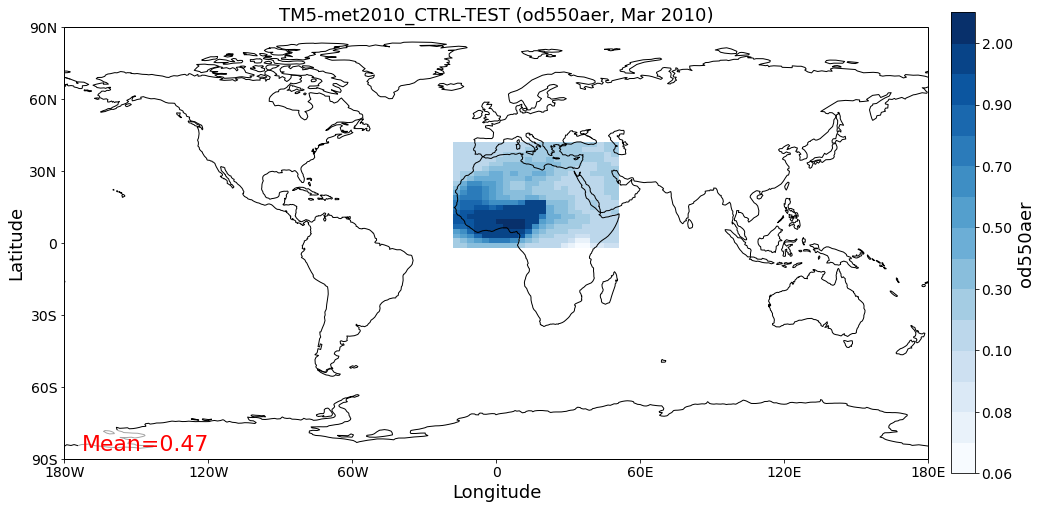

In [33]:
od550aer_nafrica.quickplot_map('March 2010');

#### Binary region masks

Available [HTAP](http://www.htap.org/) binary filter masks can be accessed via:

In [38]:
print(pya.const.HTAP_REGIONS)

['PAN', 'EAS', 'NAF', 'MDE', 'LAND', 'SAS', 'SPO', 'OCN', 'SEA', 'RBU', 'EEUROPE', 'NAM', 'WEUROPE', 'SAF', 'USA', 'SAM', 'EUR', 'NPO', 'MCA']


And they are handled in the same way as the rectangular regions:

Failed to compute / add area weighted mean. Reason: ValueError('Format specifier missing precision')


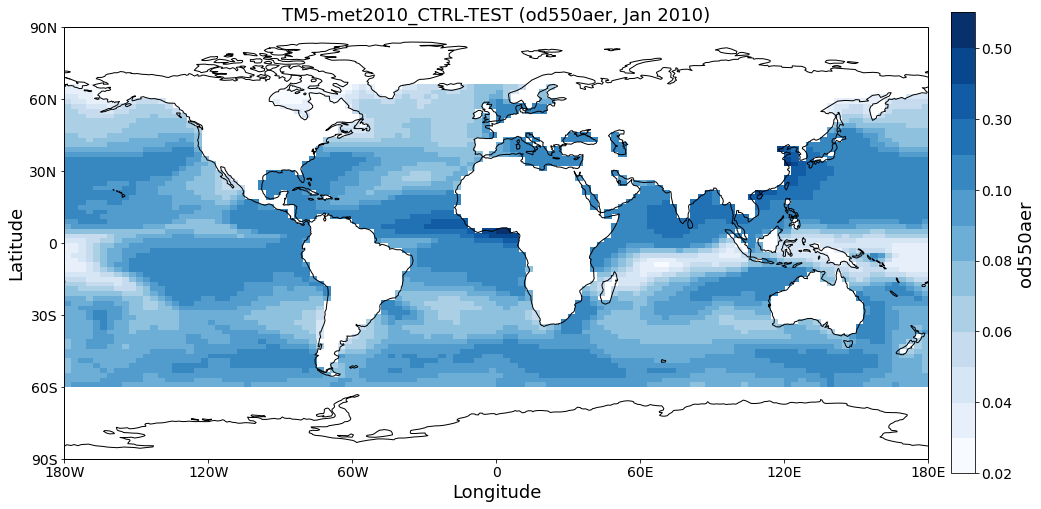

In [39]:
pya.Filter('OCN')(od550aer_tm5).quickplot_map();

As you can see the provided HTAP region masks are only valid within 60$^\circ$S to 60$^\circ$N.

#### Filtering of time

Filtering of time is not yet included in the Filter class but can be easily performed from the `GriddedData` object directly. If you know the indices of the time stamps you want to crop, you can simply use numpy indexing syntax (remember that we have a 3D array containing time, latitude and lonfgitude). 

Let's say we want to filter the june to august.

Since the time dimension corresponds the first index in the 3D data (time, lat, lon), and since we know, that we have monthly 2010 data (see above), we may use:

In [41]:
od550aer_nafrica_2009 = od550aer_nafrica[5:8]
od550aer_nafrica_2009.time_stamps()

array(['2010-06-15T00:00:00.000000', '2010-07-15T12:00:00.000000',
       '2010-08-15T12:00:00.000000'], dtype='datetime64[us]')

However, this methodology might not always be handy (imagine you have a 10 year dataset of `3hourly` sampled data and want to extract three months in the 6th year ...). In that case, you can perform the cropping using the actual timestamps:

In [43]:
od550aer_nafrica_2009_alt = od550aer_nafrica.crop(time_range=('6-2010', '9-2010'))
od550aer_nafrica_2009.time_stamps()

array(['2010-06-15T00:00:00.000000', '2010-07-15T12:00:00.000000',
       '2010-08-15T12:00:00.000000'], dtype='datetime64[us]')

#### Data aggregation

Let's say we want to compute yearly means for each of the 3 years. In this case we can simply call the `downscale_time` method:

This method is deprecated. Please use new name resample_time


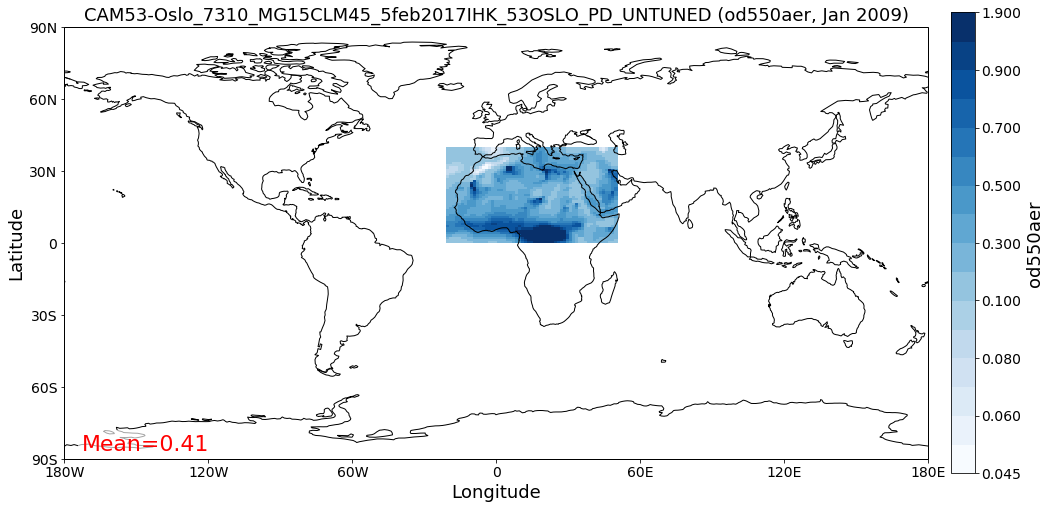

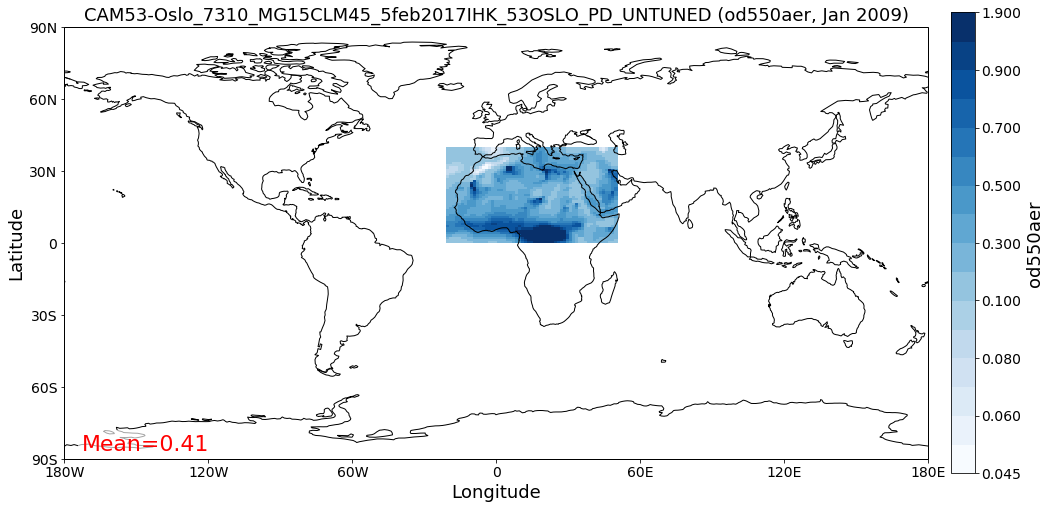

In [21]:
od550aer_nafrica.downscale_time('yearly')
od550aer_nafrica.quickplot_map('2009')

**Note**: seasonal aggregation is not yet implemented in pyaerocom but will follow soon.

In the following section the reading of ungridded data is illustrated based on the example of AERONET version 3 (level 2) data. The test dataset contains a randomly picked subset of 100 Aeronet stations. Aeronet provides different products, 

### Reading of and working with ungridded data (`ReadUngridded` and `UngriddedData` classes)

Ungridded data in pyaerocom refers to data that is available in the form of *files per station* and that is not sampled in a manner that it would make sense to translate into a rgular gridded format such as the previously introduced `GriddedData` class. 

Data from the AERONET network (that is introduced in the following), for instance, is provided in the form of column seperated text files per measurement station, where columns correspond to different variables and data rows to individual time stamps. Needless to say that the time stamps (or the covered periods) vary from station to station. 

The basic workflow for reading of ungridded data, such as Aeronet data, is very similar to the reading of gridded data (comprising a reading class that handles a query and returns a data class, here [UngriddedData](http://aerocom.met.no/pyaerocom/api.html#module-pyaerocom.ungriddeddata) (see also flow chart above).

Before we can continue with the data import, some things need to be said related to the caching of `UngriddedData` objects. 

#### Caching of UngriddedData

Reading of ungridded data is often rather time-consuming. Therefore, pyaerocom uses a caching strategy that stores loaded instances of the `UngriddedData` class as pickle files in a cache directory (illustrated in the left hand side of the flowchart shown above). The loaction of the cache directory can be accessed via:

In [22]:
pya.const.CACHEDIR

'/home/jonasg/MyPyaerocom/_cache/jonasg'

You may change this directory if required.

In [23]:
print('Caching is active? {}'.format(pya.const.CACHING))

Caching is active? True


##### Deactivate / Activate caching

In [24]:
pya.const.CACHING = False

In [25]:
pya.const.CACHING = True

**Note**: if caching is active, make sure you have enough disk quota or change location where the files are stored.

#### Read Aeronet Sun v3 level 2 data

As illustrated in the flowchart above,  ungridded observation data can be imported using the `ReadUngridded` class. The reading class requires an ID for the observation network that is supposed to be read. Let's find the right ID for these data:

In [26]:
pya.browse_database('Aeronet*V3*Lev2*')


Dataset name: AeronetSunV3Lev2.daily
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSunV3Lev2.0.daily/renamed
Supported variables: ['od340aer', 'od440aer', 'od500aer', 'od870aer', 'ang4487aer', 'ang4487aer_calc', 'od550aer']
Last revision: 20190920

Dataset name: AeronetSunV3Lev2.AP
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSunV3Lev2.0.AP/renamed
Supported variables: ['od340aer', 'od440aer', 'od500aer', 'od870aer', 'ang4487aer', 'ang4487aer_calc', 'od550aer']
Last revision: 20190511

Dataset name: AeronetSDAV3Lev2.daily
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/Aeronet.SDA.V3L2.0.daily/renamed
Supported variables: ['od500gt1aer', 'od500lt1aer', 'od500aer', 'ang4487aer', 'od550aer', 'od550gt1aer', 'od550lt1aer']
Last revision: 20190920
Reading failed for AeronetSDAV3Lev2.AP. Error: NetworkNotImplemented('No reading class available yet for dataset AeronetSDAV3Lev2.AP')

Dataset name: Aeron

It found one match and the dataset ID is *AeronetSunV3Lev2.daily*. It also tells us what variables can be loaded via the interface.

**Note**: You can safely ignore all the warnings in the output. These are due to the fact that the testdata set does not contain all observation networks that are available in the AEROCOM database.

In [27]:
obs_reader = pya.io.ReadUngridded('AeronetSunV3Lev2.daily')
print(obs_reader)


Dataset name: AeronetSunV3Lev2.daily
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSunV3Lev2.0.daily/renamed
Supported variables: ['od340aer', 'od440aer', 'od500aer', 'od870aer', 'ang4487aer', 'ang4487aer_calc', 'od550aer']
Last revision: 20190920


Let's read the data (you can read a single or multiple variables at the same time). For now, we only read the AOD at 550 nm:

In [28]:
aeronet_data = obs_reader.read(vars_to_retrieve='od550aer')
type(aeronet_data) #displays data type

pyaerocom.ungriddeddata.UngriddedData

As you can see, the data object is of type `UngriddedData`. Like the `GriddedData` object, also the `UngriddedData` class has an informative string representation (that can be printed):

In [29]:
print(aeronet_data)


Pyaerocom UngriddedData
-----------------------
Contains networks: ['AeronetSunV3Lev2.daily']
Contains variables: ['od550aer']
Contains instruments: ['sun_photometer']
Total no. of meta-blocks: 1230
Filters that were applied:
 Filter time log: 20191002122003
	Created od550aer single var object from multivar UngriddedData instance


#### Plot all station coordinates

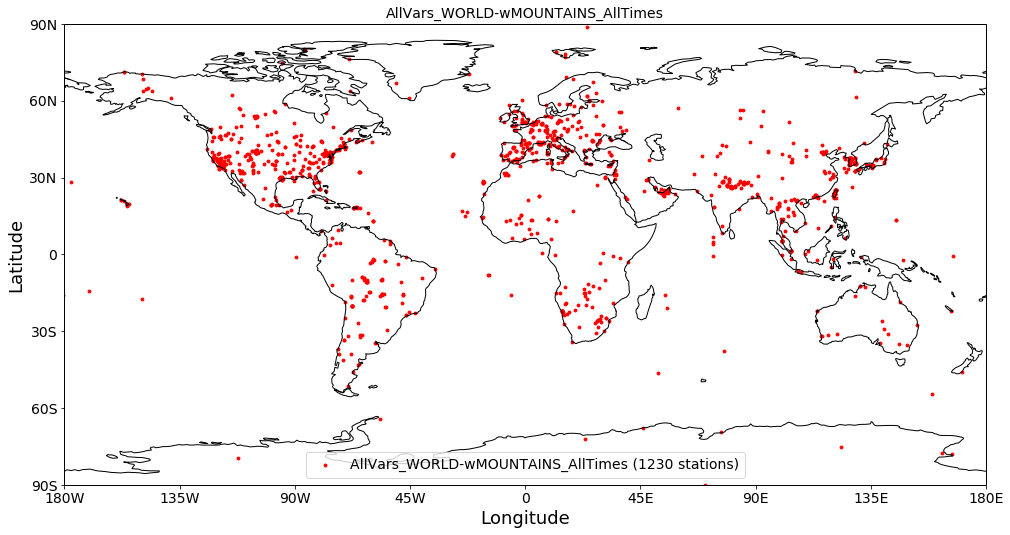

In [30]:
aeronet_data.plot_station_coordinates();

#### Access of individual stations

Get all station names:

In [31]:
all_station_names = aeronet_data.unique_station_names
all_station_names[:10]  #displays first 10 stations

['AAOT',
 'AOE_Baotou',
 'ARM_Ascension_Is',
 'ARM_Barnstable_MA',
 'ARM_Cordoba',
 'ARM_Darwin',
 'ARM_Gan_Island',
 'ARM_Graciosa',
 'ARM_Highlands_MA',
 'ARM_HyytialaFinland']

For instance, to access the data for the city of Leipzig, Germany, you can use square brackets with the station name of Leipzig:

In [32]:
station_data = aeronet_data['Leipzig'] # this is fully equivalent with aeronet_data.to_station_data('Leipzig')
type(station_data)

pyaerocom.stationdata.StationData

As you can see, the returned object is of type `StationData`, which is one further data format of pyaerocom (note that this is not displayed in the simplified  flowchart above). `StationData` may be useful for individual stations and is an extended Python dictionary (if you are familiar with Python). 

You may print it to see what is in there:

In [33]:
print(station_data)


Pyaerocom StationData
---------------------
var_info (BrowseDict):
  od550aer (OrderedDict):
    units: 1
    overlap: False
    ts_type: daily
    apply_constraints: False
    min_num_obs: None
station_coords (dict):
  latitude: 51.352500000000006
  longitude: 12.435277999999998
  altitude: 125.0
data_err (BrowseDict): <empty_dict>
overlap (BrowseDict): <empty_dict>
data_flagged (BrowseDict): <empty_dict>
filename: None
station_id: None
station_name: Leipzig
instrument_name: sun_photometer
PI: Brent_Holben
country: None
ts_type: daily
latitude: 51.352500000000006
longitude: 12.435277999999998
altitude: 125.0
data_id: AeronetSunV3Lev2.daily
dataset_name: None
data_product: None
data_version: None
data_level: None
revision_date: None
website: None
ts_type_src: daily
stat_merge_pref_attr: None
data_revision: 20190920

Data arrays
.................
dtime (ndarray, 6363 items): [2001-05-21T00:00:00.000000000, 2001-05-22T00:00:00.000000000, ..., 2018-10-20T00:00:00.000000000, 2018-10-21T00

As you can see, this station contains a time-series of the AOD at 550 nm. If you like, you can plot this time-series:

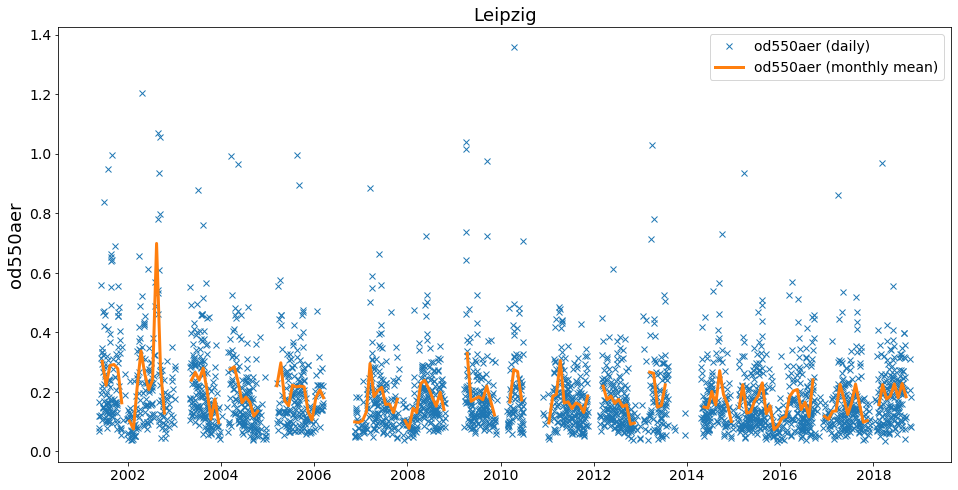

In [34]:
ax = station_data.insert_nans_timeseries('od550aer').plot_timeseries('od550aer', marker='x', ls='none')
station_data.plot_timeseries('od550aer', freq='monthly', marker=' ', ls='-', lw=3, ax=ax)

You can also retrieve the `StationData` with specifying more constraints using `to_station_data` (e.g. in monthly resolution and only for the year 2010). And you can overlay different curves, by passing the axes instance returned by the plotting method:

Text(0.5, 1.0, 'Leipzig AODs 2010')

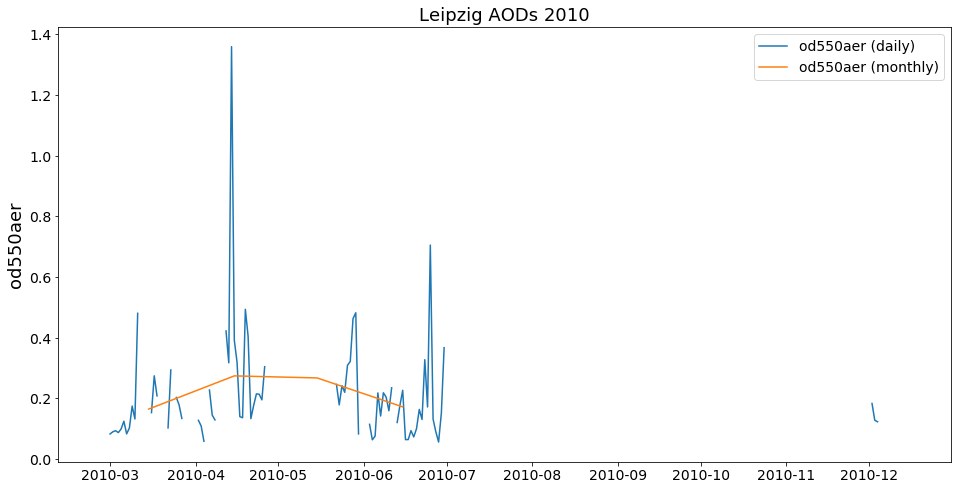

In [35]:
ax=aeronet_data.to_station_data('Leipzig', 
                                start=2010, 
                                freq='daily').plot_timeseries('od550aer')

ax=aeronet_data.to_station_data('Leipzig', 
                                start=2010, 
                                freq='monthly').plot_timeseries('od550aer', ax=ax)
ax.legend()
ax.set_title('Leipzig AODs 2010')

#### You can also plot the time-series directly

For instance, if you want to do an air-quality check for you next bouldering trip, you may call:

In [36]:
ts = aeronet_data.to_station_data('Fontainebleau', 'od550aer', 2006, None, 'monthly')
ts

StationData([('dtime',
              array(['2006-01-15T00:00:00.000000000', '2006-02-15T00:00:00.000000000',
                     '2006-03-15T00:00:00.000000000', '2006-04-15T00:00:00.000000000',
                     '2006-05-15T00:00:00.000000000', '2006-06-15T00:00:00.000000000',
                     '2006-07-15T00:00:00.000000000', '2006-08-15T00:00:00.000000000',
                     '2006-09-15T00:00:00.000000000', '2006-10-15T00:00:00.000000000',
                     '2006-11-15T00:00:00.000000000', '2006-12-15T00:00:00.000000000'],
                    dtype='datetime64[ns]')),
             ('var_info',
              BrowseDict([('od550aer',
                           OrderedDict([('units', '1'),
                                        ('overlap', False),
                                        ('ts_type', 'monthly'),
                                        ('apply_constraints', True),
                                        ('min_num_obs',
                                      

Text(0.5, 1.0, 'AOD in Fontainebleau, 2006')

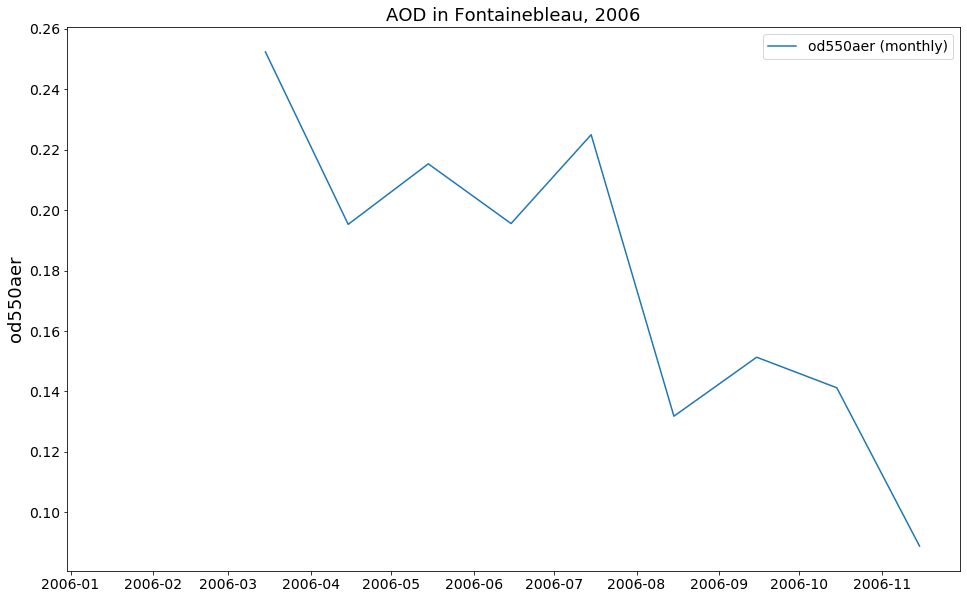

In [37]:
aeronet_data.plot_station_timeseries('Fontainebleau', 'od550aer', ts_type='monthly',
                                     start=2006).set_title('AOD in Fontainebleau, 2006')

Seems like November is a good time (maybe a bit rainy though)

### Colocation of model and obsdata

Now that we have different data objects loaded we can continue with colocation. In the following, both the all-sky and the clear-sky data from CAM53-Oslo will be colocated with the subset of Aeronet stations that we just loaded. 

The colocation will be performed for the year of 2010 and two scatter plots will be created. 

You have also the option to apply a certain filter when colocating using a valid filter name. Here, we use global data and exclude mountain sides.

In [38]:
col_all_sky_glob = pya.colocation.colocate_gridded_ungridded(od550aer, aeronet_data, 
                                                                ts_type='monthly',
                                                                start=2010,
                                                                filter_name='WORLD-noMOUNTAINS')
type(col_all_sky_glob)

Setting od550aer outlier lower lim: -1.00
Setting od550aer outlier upper lim: 10.00
Interpolating data of shape (12, 192, 288). This may take a while.
Successfully interpolated cube


pyaerocom.colocateddata.ColocatedData

Let's do the same for the clear-sky data.

In [39]:
col_clear_sky_glob = pya.colocation.colocate_gridded_ungridded(od550csaer, aeronet_data, 
                                                                  ts_type='monthly',
                                                                  start=2010,
                                                                  filter_name='WORLD-noMOUNTAINS')
type(col_clear_sky_glob)

Setting od550aer outlier lower lim: -1.00
Setting od550aer outlier upper lim: 10.00
Interpolating data of shape (12, 192, 288). This may take a while.
Successfully interpolated cube


pyaerocom.colocateddata.ColocatedData

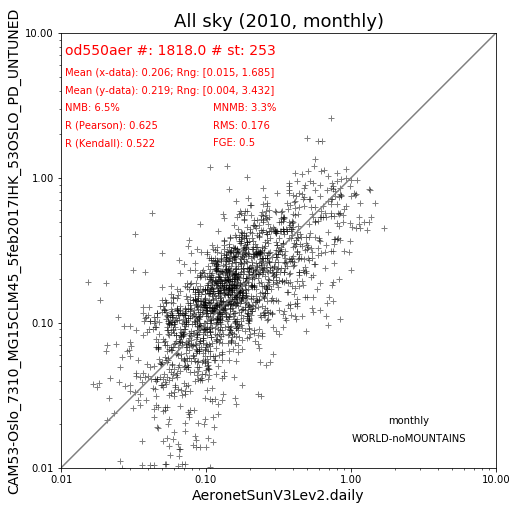

In [40]:
ax1 = col_all_sky_glob.plot_scatter()
ax1.set_title('All sky (2010, monthly)');

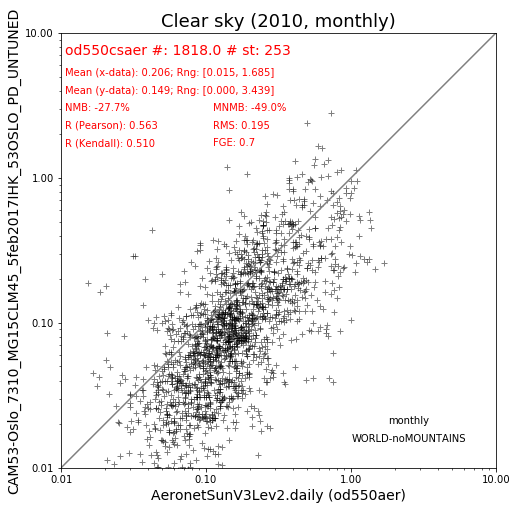

In [41]:
ax2 = col_clear_sky_glob.plot_scatter()
ax2.set_title('Clear sky (2010, monthly)');

... or for EUROPE:

Setting od550aer outlier lower lim: -1.00
Setting od550aer outlier upper lim: 10.00
Interpolating data of shape (12, 192, 288). This may take a while.
Successfully interpolated cube


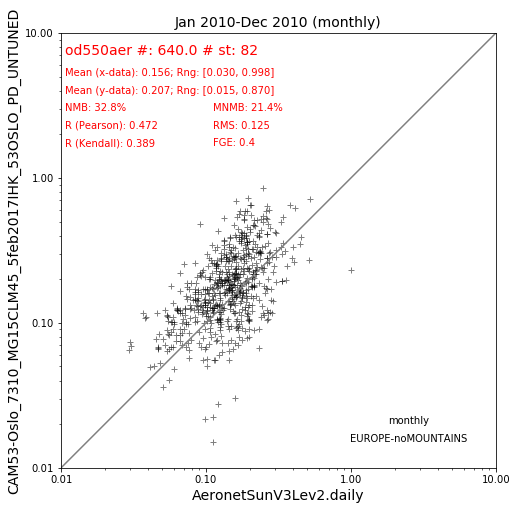

In [42]:
pya.colocation.colocate_gridded_ungridded(od550aer, aeronet_data,
                                          ts_type='monthly',
                                          start=2010,
                                          filter_name='EUROPE-noMOUNTAINS').plot_scatter();

#### Colocation with satellite AODs from MODIS

Overwriting unit unknown in cube od550aer with value "1"


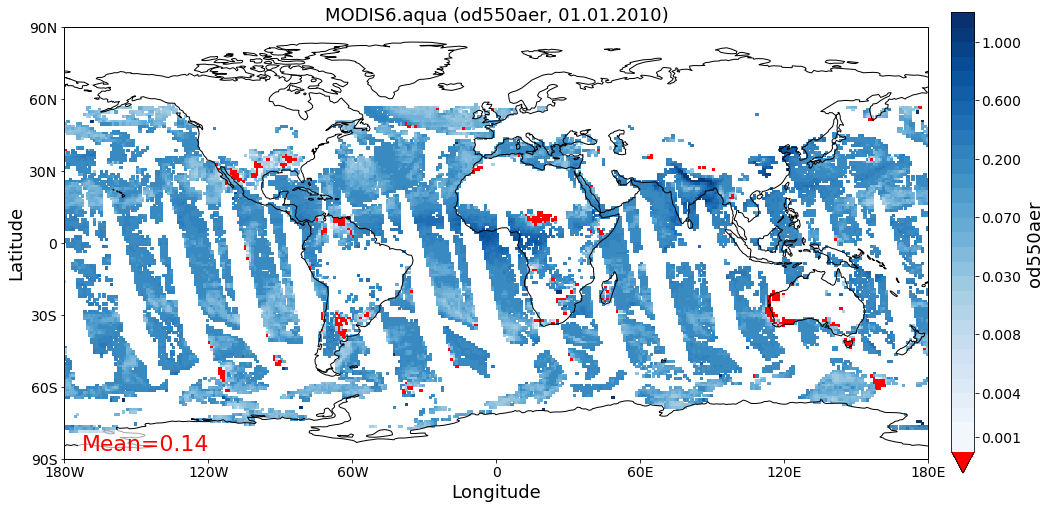

In [43]:
sat_data = pya.io.ReadGridded('MODIS6.aqua').read_var('od550aer', start=2010)
sat_data.quickplot_map(vmin=.001, vmax=3, c_under='r');

Colocation is straight forward as shown below. The data will be regridded to 5x5 degrees resolution during the colocation.

In [44]:
col_modis_monthly = pya.colocation.colocate_gridded_gridded(gridded_data=od550aer,
                                                            gridded_data_ref=sat_data,
                                                            ts_type='monthly',
                                                            regrid_res_deg=5,
                                                            remove_outliers=True,
                                                            harmonise_units=False)

Interpolating data of shape (365, 180, 360). This may take a while.
Successfully interpolated cube
Setting od550aer outlier lower lim: -1.00
Setting od550aer outlier upper lim: 10.00


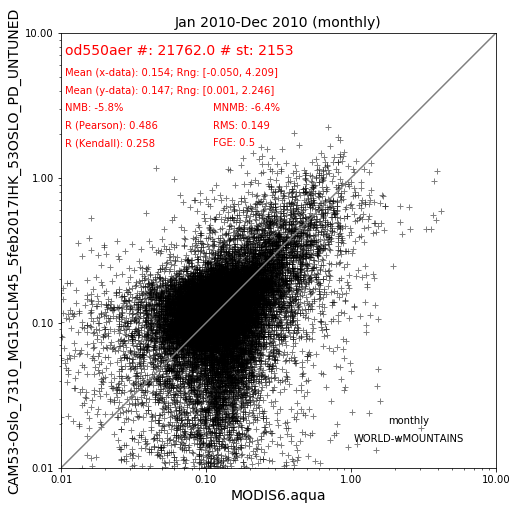

In [45]:
col_modis_monthly.plot_scatter()

You may also change the plot style, to adapt better to the large amount of data points here in these satellite products:

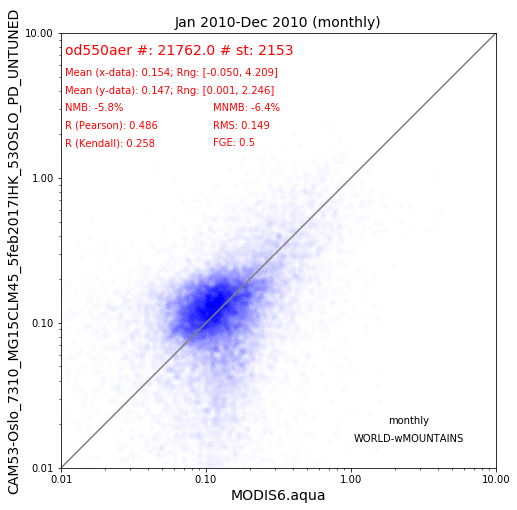

In [46]:
col_modis_monthly.plot_scatter(ms=6, marker='o',mec='none', color='b', alpha=0.01)

#### Remark on the ColocatedData object

The `ColocatedData` object has not many features and methods implemented yet. But it builds a good basis for further analysis using features of the underlying data-structure, which is an instance of the [xarray.DataArray](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.html) class and can be accessed via the `data` attribute if the `ColocatedData` object:

In [47]:
arr = col_all_sky_glob.data
type(arr)

xarray.core.dataarray.DataArray

You may want to read more about it [here](http://xarray.pydata.org/en/stable/data-structures.html).